In [74]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fsolve

In [111]:
Dp = 0.0254*6;
Hp = 0.0254*6;
HoD = Hp/Dp

In [112]:
def cP(J, HoD):
    x1 = 0.2877 + 0.9976*HoD
    x2 = -0.38
    c = -0.001849 + 0.06242*HoD
    return (J - x1)*(J - x2)*c/(x1*x2);

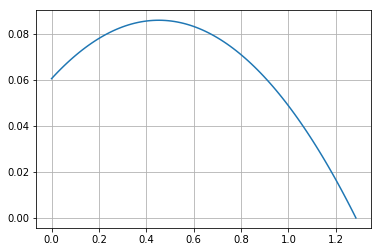

In [113]:
J_plot = np.linspace(0,0.2877 + 0.9976*HoD,100)
cP_plot = np.array([cP(j,HoD) for j in J_plot])
fig = plt.figure()
plt.plot(J_plot,cP_plot)
plt.grid()
plt.show()

In [114]:
def cT(J, HoD):
    x1 = 0.165 + 1.037 * HoD
    x2 = -1.6
    c = 0.0253 + 0.1673 * HoD - 0.0501 * HoD**2
    return (J - x1)*(J - x2)*c/(x1*x2);

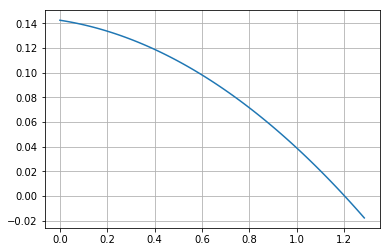

In [115]:
J_plot = np.linspace(0,0.2877 + 0.9976*HoD,100)
cT_plot = np.array([cT(j,HoD) for j in J_plot])
fig = plt.figure()
plt.plot(J_plot,cT_plot)
plt.grid()
plt.show()

## Flug mit Konstantdrehzahl

In [133]:
f = lambda n: cT(Jv(50.0, n), HoD)

nTest = np.max( fsolve(f, [1000, 50000]) )
nTest

/home/ulf/.local/lib/python3.7/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


16374.694341015398

In [134]:
def Jv(v, n):
    return v/Dp/(n/60);
Jv(20, nTest)

0.48086489946310823

In [135]:
f = lambda v: cT(Jv(v, nTest), HoD)

vZero = np.max( fsolve(f, [10, 100]) )
vZero

49.99325179866728

In [136]:
def Pmotor(v, n):
    return 1.20*(n/60)**3 * Dp**5 * cP(Jv(v, n), HoD)
def Thrust(v, n):
    return 1.20*(n/60)**2 * Dp**4 * cT(Jv(v, n), HoD)
def Pprop(v, n):
    return Thrust(v, n)*v

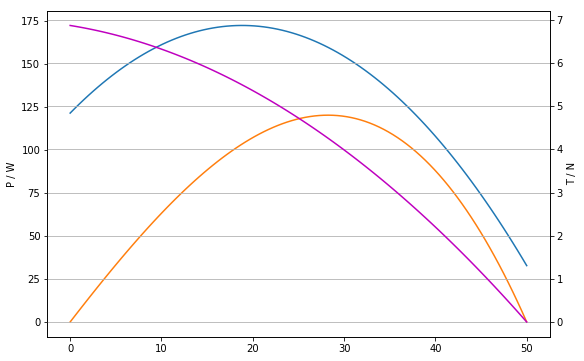

In [139]:
v_plot = np.linspace(0.0, vZero, 100)
P_plot = np.array([Pmotor(v,nTest) for v in v_plot])
Pp_plot = np.array([Pprop(v,nTest) for v in v_plot])
T_plot = np.array([Thrust(v,nTest) for v in v_plot])

fig,ax1 = plt.subplots(figsize=(9,6))
ax1.plot(v_plot, P_plot)
ax1.plot(v_plot, Pp_plot)
ax1.set_ylabel("P / W")
ax2 = ax1.twinx()
ax2.plot(v_plot, T_plot, 'm')
ax2.set_ylabel("T / N")
plt.grid()
plt.show()

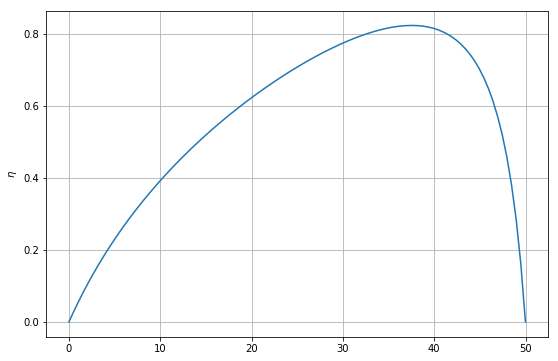

In [138]:
fig,ax1 = plt.subplots(figsize=(9,6))
ax1.plot(v_plot, Pp_plot/P_plot)
ax1.set_ylabel("$\eta$")
plt.grid()
plt.show()